In [1]:
# Load dataset
import pandas as pd

file_path = '../../data/lm2.csv'
data_df = pd.read_csv(file_path)
print('Num of features: %s' % len(data_df.columns.values))
data_df.head()

Num of features: 53


,Label,Outer left eyebrow-x,Outer left eyebrow-y,Middle left eyebrow-x,Middle left eyebrow-y,Inner left eyebrow-x,Inner left eyebrow-y,Inner right eyebrow-x,Inner right eyebrow-y,Middle right eyebrow-x,...,Lower lip inner middle-x,Lower lip inner middle-y,Lower lip outer middle-x,Lower lip outer middle-y,Chin middle-x,Chin middle-y,Left ear lobe-x,Left ear lobe-y,Right ear lobe-x,Right ear lobe-y
0,HAPPY,79.4496,557.174,176.086,436.378,433.784,444.431,675.375,452.484,908.914,...,546.527,1161.15,554.580,1225.58,570.686,1499.38,NaN,NaN,NaN,NaN
1,ANGER,90.6538,530.365,209.062,467.214,465.614,518.524,678.749,502.736,883.991,...,603.953,1118.97,595.863,1130.30,590.090,1467.86,NaN,NaN,NaN,NaN
2,SURPRISE,86.5398,546.773,117.065,398.508,378.710,415.951,710.126,398.508,915.081,...,544.418,1261.94,535.696,1331.71,548.779,1567.19,36.7298,978.497,1078.27,947.863
3,FEAR,104.6750,518.635,179.731,439.410,384.049,435.240,680.102,443.580,851.062,...,555.009,1223.32,563.349,1335.91,571.688,1552.74,NaN,NaN,NaN,NaN
4,DISGUST,115.4420,526.418,241.744,459.320,435.145,514.577,648.280,490.895,845.627,...,585.227,1116.66,589.076,1150.04,596.969,1438.16,74.5932,913.326,NaN,NaN


In [2]:
# Drop features where 'NaN' is present
data_df = data_df.dropna(axis=1, how='any')
print('Num of features: %s' % len(data_df.columns.values))
data_df.head()

Num of features: 43


,Label,Outer left eyebrow-x,Outer left eyebrow-y,Middle left eyebrow-x,Middle left eyebrow-y,Inner left eyebrow-x,Inner left eyebrow-y,Inner right eyebrow-x,Inner right eyebrow-y,Middle right eyebrow-x,...,Upper lip outer middle-x,Upper lip outer middle-y,Right mouth corner-x,Right mouth corner-y,Upper lip inner middle-x,Upper lip inner middle-y,Lower lip inner middle-x,Lower lip inner middle-y,Lower lip outer middle-x,Lower lip outer middle-y
0,HAPPY,79.4496,557.174,176.086,436.378,433.784,444.431,675.375,452.484,908.914,...,558.606,1072.57,796.171,1072.57,550.553,1104.78,546.527,1161.15,554.580,1225.58
1,ANGER,90.6538,530.365,209.062,467.214,465.614,518.524,678.749,502.736,883.991,...,599.810,1086.88,816.893,1110.57,599.810,1110.57,603.953,1118.97,595.863,1130.30
2,SURPRISE,86.5398,546.773,117.065,398.508,378.710,415.951,710.126,398.508,915.081,...,531.336,1113.67,714.487,1187.80,540.057,1148.56,544.418,1261.94,535.696,1331.71
3,FEAR,104.6750,518.635,179.731,439.410,384.049,435.240,680.102,443.580,851.062,...,559.179,1044.03,763.497,1085.72,563.349,1077.38,555.009,1223.32,563.349,1335.91
4,DISGUST,115.4420,526.418,241.744,459.320,435.145,514.577,648.280,490.895,845.627,...,593.023,1051.36,837.733,1094.78,596.969,1098.73,585.227,1116.66,589.076,1150.04


In [4]:
features = [x != 'Label' for x in data_df.columns.values]

# Separating out the features
values = data_df.loc[:, features].values

# Separating out the label
labels = data_df.loc[:,['Label']].values

In [5]:
# Scale values (mean = 0 and variance = 1)
from sklearn.preprocessing import normalize

values =  normalize(values, axis=0)

In [6]:
# Use PCA to reduce dimensionality
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(values)
principal_df = pd.DataFrame(data = principal_components, columns = ['PCA 1', 'PCA 2'])
principal_df.head()

,PCA 1,PCA 2
0,0.025603,-0.015800
1,0.028522,-0.002577
2,0.018184,-0.016608
3,0.017572,-0.008263
4,0.021495,0.003214


In [7]:
# Add the label to the dataframe with the principal components
principal_labels_df = pd.concat([data_df[['Label']], principal_df], axis = 1)
principal_labels_df.head()

,Label,PCA 1,PCA 2
0,HAPPY,0.025603,-0.015800
1,ANGER,0.028522,-0.002577
2,SURPRISE,0.018184,-0.016608
3,FEAR,0.017572,-0.008263
4,DISGUST,0.021495,0.003214


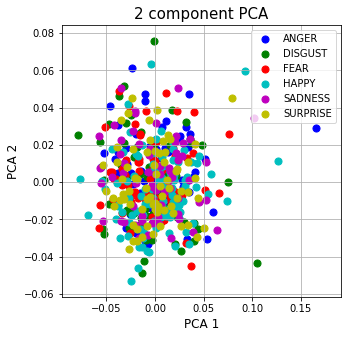

In [9]:
# Visualize the PCA 2d projection
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA 1', fontsize = 12)
ax.set_ylabel('PCA 2', fontsize = 12)
ax.set_title('2 component PCA', fontsize = 15)

targets = ['ANGER', 'DISGUST', 'FEAR', 'HAPPY', 'SADNESS', 'SURPRISE']
colors = ['b', 'g', 'r', 'c', 'm', 'y']
for target, color in zip(targets, colors):
    indexes_to_keep = principal_labels_df['Label'] == target
    ax.scatter(
        principal_labels_df.loc[indexes_to_keep, 'PCA 1'],
        principal_labels_df.loc[indexes_to_keep, 'PCA 2'],
        c = color,
        s = 50
    )
ax.legend(targets)
ax.grid()